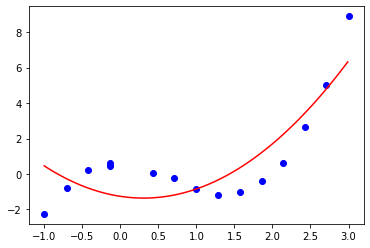

<Figure size 432x288 with 0 Axes>

In [156]:
import numpy as np
import matplotlib.pyplot as plt

x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

m = 2

a = MNK(x, y, m)


img(x, y, a)



In [154]:
def MNK(x, y, m):
    m += 1
    
    N = len(x) 
    
    if N != len(y):
        print('error')
        return
    
    c = np.zeros((m, m))

    
    for k in range(m):
        for j in range(m):
            for i in range(N):
                c[k,j] += x[i]**(k + j)
                
    d =np.zeros(m)
    for k in range(m):
        for i in range(N):
            d[k] += y[i] * (x[i]**k) 
    
    a = np.linalg.solve(c, d)

    return a


    
                
    

In [153]:
def img(x, y, a):
    m = len(a)
    
    x1 = list()
    y1 = list()
    
    for xnow in range(int(min(x)*100), int(max(x)*100)): 
        xnow = xnow/100
        ynow = 0
        for i in range(len(a)):
            ynow += a[i] * (xnow**i) 
        x1.append(xnow)
        y1.append(ynow)
    
    
    plt.scatter(x, y, color='blue')
    plt.plot(x1, y1, color='red')
    fig = plt.figure()


Часть вторая

In [102]:
def polinom_y(x,a):
    y = 0
    for i in range(len(a)):
        y += a[i] * (x**i) 
    return y

3


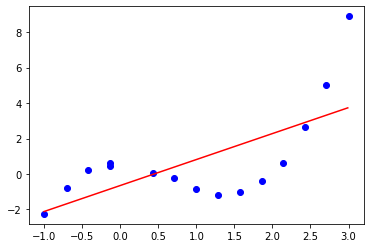

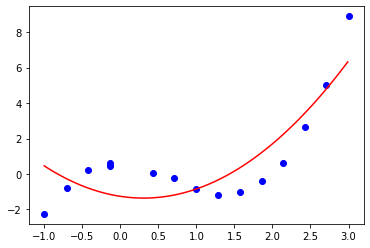

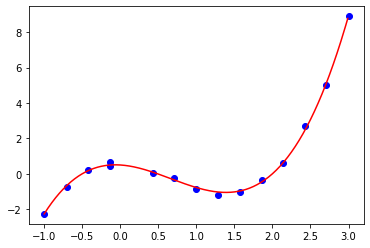

<Figure size 432x288 with 0 Axes>

In [150]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

N = len(x)
    
list_disp = list()
    
for m in range(20):

    a = MNK(x, y, m + 1)

    
    delta = 0
    for k in range(N):
        delta += (polinom_y(x[k], a) - y[k])**2

    disp = delta/(N-m) 
    list_disp.append(disp)
    if m != 0:
        last_disp = list_disp[len(list_disp) - 2]
        dd = -100*(disp - last_disp) / last_disp
        
        if dd < 5:
            best_m = m
            break
    img(x, y, m, a)
    best_m = m 

print(best_m)




In [163]:
def find_m(x, y):  
    N = len(x)
    
    if N != len(y):
        print('error')
        return
    
    list_disp = list()

    for m in range(20):

        a = MNK(x, y, m + 1)


        delta = 0
        for k in range(N):
            delta += (polinom_y(x[k], a) - y[k])**2

        disp = delta/(N-m) 
        list_disp.append(disp)
        if m != 0:
            last_disp = list_disp[len(list_disp) - 2]
            dd = -100*(disp - last_disp) / last_disp

            if dd < 5:
                best_m = m
                break
        best_m = m 
    return best_m

Полином степени 3
P(3) = +0.49*x^0 -0.27*x^1 -2.02*x^2 +1.02*x^3


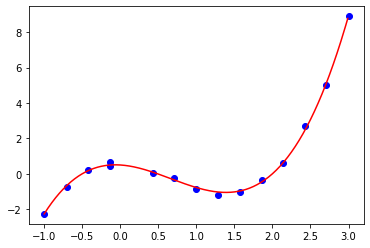

<Figure size 432x288 with 0 Axes>

In [190]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

a = MNK(x, y, find_m(x,y))


print('Полином степени', find_m(x,y))
f = ''
for i in range(len(a)):
    f = f + ' ' + str(sign(np.around(a[i],2))) + '*x^' + str(i)
print('P(' + str(find_m(x,y)) + ') =' + f)


img(x, y, a)

In [187]:
def sign(num):
    return str(num) if num < 0 else '+' + str(num)

Часть 3